## sigmoid 문제점
- input이 주어졌을 때 weight를 곱하고 sigmoid activation을 사용해서 output을 구하는 과정.
- 정답 데이터 GT와 output 사이 차이인 loss 를 구함.
- loss를 구하면 gradient를 구할 수 있게 되고, backpropagation 알고리즘으로 전파하면서 weight 업데이트 하면서 학습하게 됨.
- sigmoid activation function은 gradient를 구할 때 0 가까이에서는 잘 구 할 수 있으나 양 끝 부분에서 gradient구하면 0에 가까운 아주 작은 값이 나오게 됨.
=> backpropagation 알고리즘으로 그라디언트 전파 시킬 때 아주 작은 값을 곱함으로써 값이 소멸될 수 있음 = vanishing gradient
- sigmoid 함수 사용하는 여러 레이어가 쌓이면 아주 작은 gradient가 계속해서 곱해지면 앞단에서는 거의 gradient를 전파받을 수 없음.

## ReLU
- f(x) = max(0, x)
- 입력 x가 들어왔을 때 x가 0보다 크면 자기 자신, 음수면 0으로 출력
- 0이 아닌 부분에서는 vanishing 문제가 없으나 음수 영역에서는 gradient가 아예 사라지게 됨. 
- x = torch.nn.relu(x)

## Optimizer in PyTorch
- torch.optim.SGD
- torch.optim.Adadelta
- torch.optim.Adagrad
- torch.optim.Adam
- torch.optim.SparseAdam
- torch.optim.Adamax
- torch.optim.ASGD
- torch.optim.LBFGS
- torch.optim.RMSprop
- torch.optim.Rprop

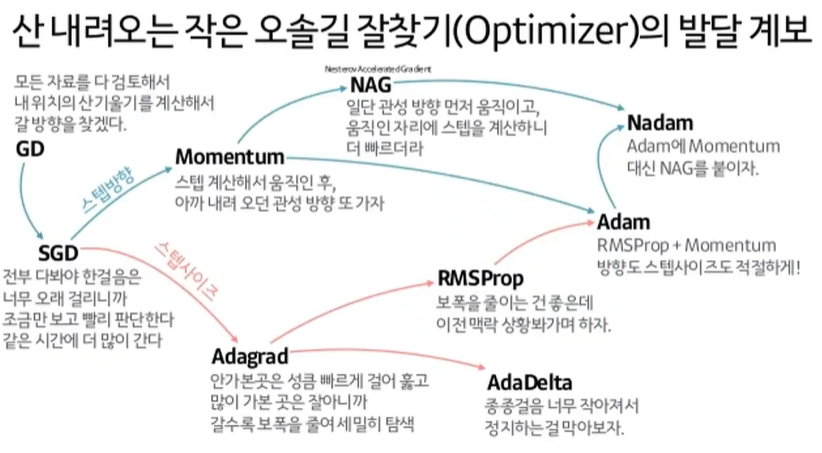

In [12]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [13]:
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)

batch_size = 100
training_epochs = 15
data_loader = torch.utils.data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)

# MNIST data image of shape 28 * 28 = 784
# MNIST가 0-9 의 라벨을 가지기에 10.
linear = torch.nn.Linear(28 * 28, 10, bias=True).to(device)

# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr=0.001)

total_batch = len(data_loader)
for epoch in range(training_epochs + 1):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    
    print("Epoch: {:04d}, Cost: {:.9f}".format(epoch, avg_cost))

Epoch: 0000, Cost: 0.614322722
Epoch: 0001, Cost: 0.344514877
Epoch: 0002, Cost: 0.308487236
Epoch: 0003, Cost: 0.291329682
Epoch: 0004, Cost: 0.281550318
Epoch: 0005, Cost: 0.274611503
Epoch: 0006, Cost: 0.269422799
Epoch: 0007, Cost: 0.264997184
Epoch: 0008, Cost: 0.261648208
Epoch: 0009, Cost: 0.259036928
Epoch: 0010, Cost: 0.256706297
Epoch: 0011, Cost: 0.254275382
Epoch: 0012, Cost: 0.252618015
Epoch: 0013, Cost: 0.251062512
Epoch: 0014, Cost: 0.249662444
Epoch: 0015, Cost: 0.248479947


Accuracy: 0.9023000001907349
Label:  8
Prediction:  8


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datasets\mnist.py:81: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\datasets\mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


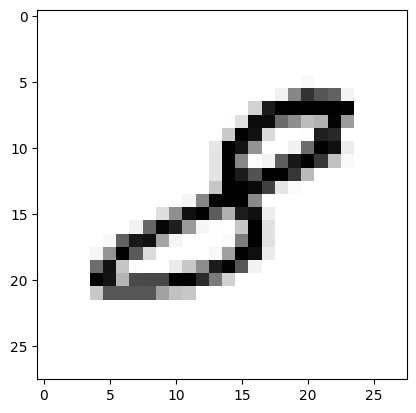

In [14]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()

## mnist_nn

In [15]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [16]:
# nn layers
linear1 = torch.nn.Linear(784, 256, bias=True)
linear2 = torch.nn.Linear(256, 256, bias=True)
linear3 = torch.nn.Linear(256, 10, bias=True)
relu = torch.nn.ReLU()

In [17]:
torch.nn.init.normal_(linear1.weight)
torch.nn.init.normal_(linear2.weight)
torch.nn.init.normal_(linear3.weight)

Parameter containing:
tensor([[-0.7173,  0.8987, -0.5762,  ..., -0.5947,  0.0544, -1.1019],
        [-0.9334,  0.3137,  0.1072,  ..., -0.1398,  0.5071, -0.6317],
        [ 0.1927, -0.3062, -2.0626,  ...,  0.6456, -0.5434, -0.0087],
        ...,
        [ 0.2015, -1.0474, -0.5111,  ..., -0.0102,  0.3290,  0.1745],
        [-1.6524,  0.0045,  0.3246,  ..., -1.2621, -1.4545,  0.8762],
        [-0.9453, -0.1196,  0.1081,  ..., -0.7789, -0.1084, -0.9906]],
       requires_grad=True)

In [18]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3).to(device)

In [19]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(data_loader)
for epoch in range(training_epochs):
    avg_cost = 0
    for X, Y in data_loader:
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
    
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('learning finished')

ValueError: Format specifier missing precision

In [ ]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())